<h2>
    <u>
    AI Project - Members</u>
</h2>

<h3>
    📊Ruse Teodor <br> 
    🌟Rusu Dana <br> 
    💻Silivăstru Oana <br> 
    💡Stan Ariana
</h3>

<h1>🧠Hand Gesture Recognition Using Background <br>
Ellimination and Convolution Neural Network🖼️</h1>

<h1>Introduction</h1>
<p>This project is all about recognizing hand gestures, specifically sign language digits from 1 to 9, along with gestures for "like" and "palm." The heart of the project is a smart Convolutional Neural Network (CNN) model trained to identify these gestures accurately. Plus, the app comes with some cool background elimination tricks. These tricks help the app focus only on hand movements in live video, making the gesture recognition super accurate. This project shows how we can use smart computer vision and deep learning tech to build real-time gesture recognition tools. These tools can be handy for things like accessibility and making computers easier to use.</p>

<h3>What is Background Elimination ?</h3>
<p>The background elimination process involves isolating the hand gestures from the background to enhance the accuracy of the gesture recognition model. This technique removes unwanted background noise, ensuring that only the hand gesture is highlighted in the image. This improves the model's focus on the gesture, leading to better feature extraction and classification.</p>

<h3>Overview of the Image Capture and Renaming Process</h3>
<p>The images used in this project are manually captured and saved with a resolution of 256x256 pixels in RGB format. This process helps create a diverse and well-organized set of images for further use,</p>

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imutils

folder_name = #gesture name
file_index_start = #start index
file_name = folder_name + '/' + folder_name + '_'
bg = None

def run_avg(image, aWeight):
    global bg
    # initialize the background
    if bg is None:
        print("Started calibrating, please wait...")
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, aWeight)

def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

if __name__ == "__main__":
    # initialize weight for running average
    aWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 0, 0, 256, 256

    # initialize num of frames
    num_frames = 0

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our running average model gets calibrated
        if num_frames < 30:
            run_avg(gray, aWeight)
        else:
            if num_frames == 30:
                print("Finnished Calibrating, starting app...")
            
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))
                cv2.imshow("Thesholded", thresholded)

        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0,255,0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break
        if keypress == ord("p"):
            cv2.imwrite(str(file_name) + str(file_index_start) + '.jpg', thresholded)
            print('Saved image ' + str(file_index_start))
            file_index_start +=1
        if keypress == ord("u"):
            num_frames=0

camera.release()
cv2.destroyAllWindows()

<p>To ensure variability and improve the robustness of the model, images from each gesture category are shuffled and renamed if needed</p>

In [ ]:
import os
import random

def rename_images(folder_path, file_index_start):
    if not os.path.exists(folder_path):
        print(f"Folderul {folder_path} nu există.")
        return

    folder_name = os.path.basename(folder_path.rstrip('/'))
    files = os.listdir(folder_path)

    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    images = [file for file in files if os.path.splitext(file)[1].lower() in image_extensions]

    random.shuffle(images)

    index = file_index_start
    for image in images:
        new_name = f"{folder_name}_{index}{os.path.splitext(image)[1]}"
        old_path = os.path.join(folder_path, image)
        new_path = os.path.join(folder_path, new_name)
        os.rename(old_path, new_path)
        print(f"Renamed {old_path} to {new_path}")
        index += 1

folder_path = #path 
file_index_start = 1
rename_images(folder_path, file_index_start)

<h1>Data Loading, Normalization, and Splitting</h1>
<p>After capturing and shuffling images, the next crucial steps in preparing your dataset for training a machine learning model are loading the images, normalizing them, splitting them into training and testing sets, and encoding the labels. </p>
<title>Loading and Duplicating Data: </title>

In [ ]:
images = []

def load_data():
    dataset_path = #path
    for filename in glob.glob(dataset_path):
        img=Image.open(filename).convert('1')
        name = filename.split('\\')[1]
        images.append(MyImage(img,name))
        #Dublare de date
        images.append(MyImage(img,name))

print('Loading Data...')
load_data()
random.shuffle(images)
random.shuffle(images)
random.shuffle(images)
print("Number of loaded photos:",  str(len(images)))

<title>Splitting Data into Training and Testing Sets</title>

In [ ]:
def splitData():
    np.random.seed(5)
    np.random.shuffle
    indexes = [i for i in range(len(images))]
    trainSample = np.random.choice(indexes, int(0.8 * len(images)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = []
    trainOutputs = []
    testInputs = []
    testOutputs = []
    
    for i in testSample:
        testInputs.append((np.asarray(images[i].getImage())) / 1)
        testOutputs.append(images[i].getName())
       
    for i in trainSample:
        trainInputs.append((np.array(images[i].getImage())) / 1)
        trainOutputs.append(images[i].getName())
    
    return trainInputs, trainOutputs, testInputs, testOutputs

trainInputs, trainOutputs, testInputs, testOutputs = splitData()
print('Length of training array:', len(trainInputs))
print('Length of testing array:', len(testInputs))

trainInputs = np.array(trainInputs)
trainOutputs = np.array(trainOutputs)
testInputs = np.array(testInputs)
testOutputs = np.array(testOutputs)

label_encoder = LabelEncoder()
trainOutputs = label_encoder.fit_transform(trainOutputs)
testOutputs = label_encoder.transform(testOutputs)

<h1>✨CNN Model</h1>
<p>After preparing and splitting the dataset, the next step is to build and train a Convolutional Neural Network (CNN) model. The model is designed to classify hand gestures into 11 different categories, which correspond to numbers 1 through 9 in sign language, like and palm.</p>

In [ ]:
# Define the model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout to prevent overfitting
model.add(layers.Dense(11))  # Output layer with 11 classes

# Display the model summary
model.summary()

<h1>Model Summary</h1>
<p>Calling model.summary() provides an overview of the model architecture, including the layers, output shapes, and the number of parameters:</p>
<pre>Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
conv2d (Conv2D)              (None, 254, 254, 128)     1280
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      73792
_________________________________________________________________
max_pooling2d_1 (MaxPooling2D) (None, 62, 62, 64)       0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928
_________________________________________________________________
max_pooling2d_2 (MaxPooling2D) (None, 30, 30, 64)       0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0
_________________________________________________________________
dense (Dense)                (None, 64)                1384512
_________________________________________________________________
dropout (Dropout)            (None, 64)                0
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0
_________________________________________________________________
dense_2 (Dense)              (None, 11)                715
=================================================================
Total params: 1,528,099
Trainable params: 1,528,099
Non-trainable params: 0
_________________________________________________________________
</pre>

<h1>Model Compilation and Training</h1>
<p>We compile the model using the Adam optimizer, which is a popular choice for its adaptive learning rate capabilities. Additionally, we utilize the sparse categorical cross-entropy loss function, suitable for multi-class classification tasks where the target labels are integers.</p>

In [ ]:
# #Compilare si antrenare model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(trainInputs, trainOutputs, epochs= #noEpochs, 
                    validation_data=(testInputs, testOutputs))

<h1>Model Evaluation and Visualization</h1>
<p>To understand the model's performance during training, we plot the accuracy and loss metrics over epochs. This visual representation aids in assessing the model's convergence and potential overfitting or underfitting issues.</p>

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

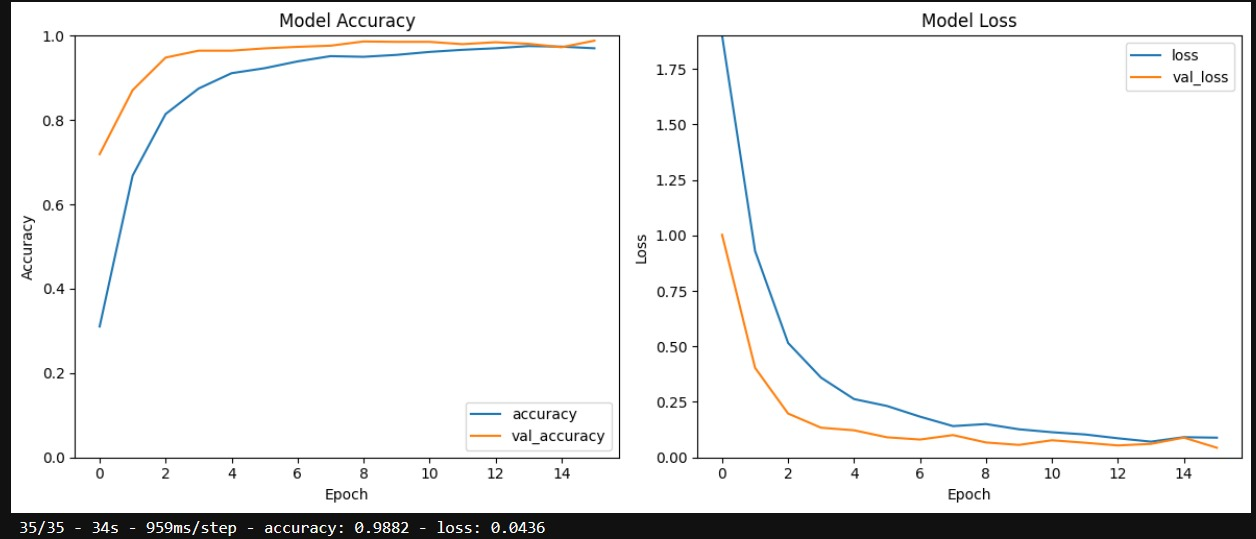

In [2]:
from IPython.display import Image
Image(filename="C:/Users/ariis/OneDrive/Desktop/Grafic.jpg")

<h1>Model Evaluation on Test Data</h1>
<p>Finally, we evaluate the trained model on the test dataset to obtain insights into its generalization performance. This includes computing the test loss and accuracy metrics.</p>

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(testInputs, testOutputs, verbose=2)

<h1>Saving the Trained Model</h1>
<p>To preserve the trained neural network model along with its learned weights and architecture, we save it using the save() method provided by Keras. This allows us to reload the model later for inference or further training.</p>

In [ ]:
path = #path
model.save(path)

<h1>Loading a Trained Model</h1>
<p>The load_model() method is used to load a previously trained neural network model from a saved file.</p>

In [ ]:
path = #path of the model
model_new = keras.models.load_model(path)

<h1>Real-Time Hand Gesture Recognition Application</h1>
<p>This Python script implements a real-time hand gesture recognition application using computer vision techniques and a pre-trained neural network model. The application captures video frames from a webcam, segments the hand region, and classifies the gesture based on the segmented hand image.</p>

In [ ]:
# Initialize the background model variable.
bg = None

# Function to update the running average background model.
def run_avg(image, aWeight):
    global bg
    # If the background model is not initialized, copy the current frame as the background model.
    if bg is None:
        print("Started calibrating, please wait...")
        bg = image.copy().astype("float")
        return
    # Update the background model using the accumulated weighted method.
    cv2.accumulateWeighted(image, bg, aWeight)

# Function to segment the hand region from the background.
def segment(image, threshold=25):
    global bg
    # Compute the absolute difference between the background and the current frame.
    diff = cv2.absdiff(bg.astype("uint8"), image)
    # Apply a threshold to obtain the binary image containing the hand region.
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]
    # Find contours in the binary image to identify the hand region.
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # If no contours are found, return None.
    if len(cnts) == 0:
        return None
    else:
        # Get the largest contour, which corresponds to the hand region.
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

if __name__ == "__main__":
    # Set the weight for updating the background model.
    aWeight = 0.5
    # Initialize the camera object to capture video frames.
    camera = cv2.VideoCapture(0)
    # Define the region of interest (ROI) coordinates.
    top, right, bottom, left = 0, 0, 256, 256
    # Initialize the number of frames processed.
    num_frames = 0
    # Define the gesture classes.
    clase = ['like', 'nr1', 'nr2', 'nr3', 'nr4', 'nr5', 'nr6', 'nr7', 'nr8', 'nr9', 'palma']

    # Main loop for capturing and processing video frames.
    while True:
        # Read a frame from the camera.
        (grabbed, frame) = camera.read()
        # Resize the frame to a fixed width.
        frame = imutils.resize(frame, width=700)
        # Flip the frame horizontally to correct mirror view.
        frame = cv2.flip(frame, 1)
        # Create a clone of the frame for visualization.
        clone = frame.copy()
        # Get the height and width of the frame.
        (height, width) = frame.shape[:2]
        # Extract the region of interest (ROI) from the frame.
        roi = frame[top:bottom, right:left]
        # Convert the ROI to grayscale and apply Gaussian blur for noise reduction.
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # Perform background calibration for the first 30 frames.
        if num_frames < 30:
            run_avg(gray, aWeight)
        else:
            # After calibration, display "Calibrated" text.
            cv2.putText(clone, "Calibrated", (10, height - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
            # Segment the hand region from the background.
            hand = segment(gray)
            if hand is not None:
                # If hand region is segmented, extract the binary image and contour.
                (thresholded, segmented) = hand
                # Draw the contour of the hand region on the clone frame.
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))
                # Display the thresholded binary image.
                cv2.imshow("Thresholded", thresholded)

                # Resize the thresholded image to match the input size of the model.
                thresholded_resized = cv2.resize(thresholded, (256, 256))
                # Normalize the pixel values and expand dimensions to create batch.
                thresholded_array = thresholded_resized.astype(np.float32) / 255.0
                thresholded_array = np.expand_dims(thresholded_array, axis=0)
                thresholded_array = np.expand_dims(thresholded_array, axis=-1)

                # Perform prediction using the loaded model.
                predictions = model2.predict(thresholded_array, verbose=0)
                confidence_scores = tf.nn.softmax(predictions[0]).numpy()

                # Find the index of the gesture class with maximum confidence score.
                max_index = np.argmax(confidence_scores)

                # Display the gesture classes and their corresponding confidence scores.
                for i, score in enumerate(confidence_scores):
                    color = (255, 0, 0) if i != max_index else (0, 0, 255)
                    text = f"{clase[i]}: {score:.4f}"
                    cv2.putText(clone, text, (width - 200, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        # Draw the ROI rectangle on the clone frame.
        cv2.rectangle(clone, (left, top), (right, bottom), (255, 0, 0), 2)
        # Increment the frame counter.
        num_frames += 1
        # Display the processed frame.
        cv2.imshow("Video Feed", clone)

        # Check for keypress events.
        keypress = cv2.waitKey(1) & 0xFF
        # If 'q' is pressed, exit the loop.
        if keypress == ord("q"):
            break
        # If 'u' is pressed, reset the frame counter to recalibrate the background.
        if keypress == ord("u"):
            num_frames = 0

    # Release the camera object and destroy all windows.
    camera.release()
    cv2.destroyAllWindows()